In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
def gen_metrics(y_test,y_predict):
    cm = confusion_matrix(y_test,y_predict)
    print('confusion metrics \n',cm)
    print('classification report\n ',classification_report(y_test,y_predict))
    print('acuracy ', accuracy_score(y_test,y_predict))
    pom = 1 - accuracy_score(y_test,y_predict)
    print('Percentage Of Missclasification ', pom)

In [3]:
df = pd.read_csv('adult.csv')
df.columns = ['Age', 'Workclass', 'Fnlwgt','Education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week', 'native_country','income' ]
df.isnull().sum()
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [4]:
df.head(20)

,Age,Workclass,Fnlwgt,Education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [5]:
# Drop the columns
columns_to_drop = ['Fnlwgt', 'relationship', 'race', 'native_country','marital_status','capital_gain', 'capital_loss','education_num']
df = df.drop(columns=columns_to_drop, axis=1)

# Display the updated DataFrame
print(df.head())

   Age          Workclass   Education          occupation      sex  \
0   50   Self-emp-not-inc   Bachelors     Exec-managerial     Male   
1   38            Private     HS-grad   Handlers-cleaners     Male   
2   53            Private        11th   Handlers-cleaners     Male   
3   28            Private   Bachelors      Prof-specialty   Female   
4   37            Private     Masters     Exec-managerial   Female   

   hours_per_week  income  
0              13   <=50K  
1              40   <=50K  
2              40   <=50K  
3              40   <=50K  
4              40   <=50K  


In [6]:
# Replace "?" with "unknown" in the "Workclass" column
df['Workclass'].replace('?', 'unknown', inplace=True)


In [7]:
# Rename columns
df.columns = ['Age', 'Workclass', 'Education', 'occupation', 'sex', 'hours_per_week', 'income']

# Find the unique values and their frequencies in each column
unique_frequencies = {}
for column in df.columns:
    unique_frequencies[column] = df[column].value_counts()

# Display unique values and frequencies for each column
for column, counts in unique_frequencies.items():
    print(f"Column: {column}")
    print(counts)
    print(f"Column: {column}, Number of Different Types: {counts}")
    print("\n")
    print("\n")

# df.head()

Column: Age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
Column: Age, Number of Different Types: 36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64




Column: Workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
Column: Workclass, Number of Different Types:  Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64




Column: Education
 HS-grad         105

In [8]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)
print (x)
print(y)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(32560, 6)
(32560,)
       Age          Workclass    Education          occupation      sex  \
0       50   Self-emp-not-inc    Bachelors     Exec-managerial     Male   
1       38            Private      HS-grad   Handlers-cleaners     Male   
2       53            Private         11th   Handlers-cleaners     Male   
3       28            Private    Bachelors      Prof-specialty   Female   
4       37            Private      Masters     Exec-managerial   Female   
...    ...                ...          ...                 ...      ...   
32555   27            Private   Assoc-acdm        Tech-support   Female   
32556   40            Private      HS-grad   Machine-op-inspct     Male   
32557   58            Private      HS-grad        Adm-clerical   Female   
32558   22            Private      HS-grad        Adm-clerical     Male   
32559   52       Self-emp-inc      HS-grad     Exec-managerial   Female   

     

In [9]:
from sklearn.preprocessing import LabelEncoder

# ...

# Create a LabelEncoder instance
encoder = LabelEncoder()

# Iterate over categorical columns and encode them
for col in ['Workclass', 'Education', 'occupation', 'sex']:
    try:
        x[col] = encoder.fit_transform(x[col])
    except ValueError as e:
        print(f"Error encoding column {col}: {e}")



In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(x_test.shape)

(26048, 6)
(6512, 6)
(26048,)
(6512, 6)


## Decision Tree

In [11]:
import pickle
from sklearn.tree import DecisionTreeClassifier
m1 = DecisionTreeClassifier(criterion='gini',max_depth = 10,min_samples_split=25)
m1.fit(x_train,y_train)

# Save the trained model to a file
model_filename = 'decision_tree_model.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(m1, model_file)

print(f"Model saved to {model_filename}")


Model saved to decision_tree_model.pkl


In [12]:
print('training score ',m1.score(x_train,y_train))
print('testing score ',m1.score(x_test,y_test))

training score  0.8230958230958231
testing score  0.8072788697788698


In [13]:
y_predict_m1 = m1.predict(x_test)
print(y_predict_m1)
gen_metrics(y_test,y_predict_m1)
print('testing score ',m1.score(x_test,y_test))

[' <=50K' ' <=50K' ' <=50K' ... ' <=50K' ' >50K' ' >50K']
confusion metrics 
 [[4592  367]
 [ 888  665]]
classification report
                precision    recall  f1-score   support

       <=50K       0.84      0.93      0.88      4959
        >50K       0.64      0.43      0.51      1553

    accuracy                           0.81      6512
   macro avg       0.74      0.68      0.70      6512
weighted avg       0.79      0.81      0.79      6512

acuracy  0.8072788697788698
Percentage Of Missclasification  0.19272113022113024
testing score  0.8072788697788698


## Random

In [14]:
import pickle
from sklearn.ensemble import RandomForestClassifier
m2 = RandomForestClassifier(n_estimators=50,criterion='entropy',max_depth=10,min_samples_split=12)
m2.fit(x_train,y_train)

# Save the trained model to a file
model_filename = 'random_forest_model.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(m2, model_file)

print(f"Model saved to {model_filename}")

Model saved to random_forest_model.pkl


In [15]:
print('training score ',m2.score(x_train,y_train))
print('testing score ',m2.score(x_test,y_test))
y_predict_m2 = m2.predict(x_test)
print(y_predict_m2)
gen_metrics(y_test,y_predict_m2)
print('testing score ',m2.score(x_test,y_test))

training score  0.8263206388206388
testing score  0.816953316953317
[' >50K' ' <=50K' ' <=50K' ... ' <=50K' ' <=50K' ' >50K']
confusion metrics 
 [[4611  348]
 [ 844  709]]
classification report
                precision    recall  f1-score   support

       <=50K       0.85      0.93      0.89      4959
        >50K       0.67      0.46      0.54      1553

    accuracy                           0.82      6512
   macro avg       0.76      0.69      0.71      6512
weighted avg       0.80      0.82      0.80      6512

acuracy  0.816953316953317
Percentage Of Missclasification  0.18304668304668303
testing score  0.816953316953317


## KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier
m3 = KNeighborsClassifier(n_neighbors= 13)
m3.fit(x_train,y_train)

# Save the trained model to a file
model_filename = 'knn.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(m3, model_file)

print(f"Model saved to {model_filename}")

Model saved to knn.pkl


In [26]:
print('training score ',m3.score(x_train,y_train))
print('testing score ',m3.score(x_test,y_test))
y_predict_m3 = m3.predict(x_test)
print(y_predict_m3)
gen_metrics(y_test,y_predict_m3)
print('testing score ',m2.score(x_test,y_test))

training score  0.8113098894348895
testing score  0.7847051597051597
[' <=50K' ' >50K' ' <=50K' ... ' <=50K' ' <=50K' ' >50K']
confusion metrics 
 [[4434  525]
 [ 877  676]]
classification report
                precision    recall  f1-score   support

       <=50K       0.83      0.89      0.86      4959
        >50K       0.56      0.44      0.49      1553

    accuracy                           0.78      6512
   macro avg       0.70      0.66      0.68      6512
weighted avg       0.77      0.78      0.77      6512

acuracy  0.7847051597051597
Percentage Of Missclasification  0.21529484029484025
testing score  0.816953316953317


## logistic regression

In [17]:
from sklearn.linear_model import LogisticRegression
m4 = LogisticRegression(max_iter=1000)
m4.fit(x_train,y_train)

# Save the trained model to a file
model_filename = 'Logistic_Regression.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(m4, model_file)

print(f"Model saved to {model_filename}")

Model saved to Logistic_Regression.pkl


In [18]:
print('training score ',m4.score(x_train,y_train))
print('testing score ',m4.score(x_test,y_test))
y_predict_m4 = m4.predict(x_test)
print(y_predict_m4)
gen_metrics(y_test,y_predict_m4)
print('testing score ',m4.score(x_test,y_test))

training score  0.7602119164619164
testing score  0.7618243243243243
[' <=50K' ' <=50K' ' <=50K' ... ' <=50K' ' <=50K' ' >50K']
confusion metrics 
 [[4712  247]
 [1304  249]]
classification report
                precision    recall  f1-score   support

       <=50K       0.78      0.95      0.86      4959
        >50K       0.50      0.16      0.24      1553

    accuracy                           0.76      6512
   macro avg       0.64      0.56      0.55      6512
weighted avg       0.72      0.76      0.71      6512

acuracy  0.7618243243243243
Percentage Of Missclasification  0.23817567567567566
testing score  0.7618243243243243


In [33]:
import matplotlib.pyplot as plt

# Scores and metrics for each mode
modes = ['Decession Tree', 'Random forest', 'KNN', 'Logistic Regrecession']
training_scores = [0.8230958230958231, 0.8263206388206388, 0.8113098894348895, 0.7602119164619164]  # Example training scores
acuracy = [0.8072788697788698, 0.816953316953317 , 0.7847051597051597, 0.7618243243243243]  # Example testing scores

# Calculate percentage of misclassification and accuracy
misclassification = [0.19272113022113024 ,0.18304668304668303 , 0.21529484029484025, 0.23817567567567566]



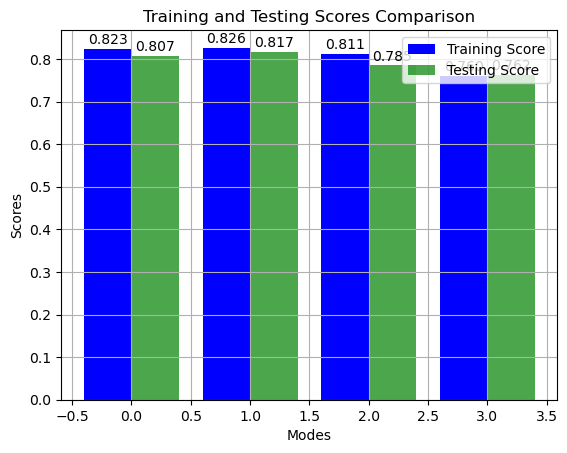

In [35]:
import matplotlib.pyplot as plt

# Scores and metrics for each mode
modes = ['Decession Tree', 'Random forest', 'KNN', 'Logistic Regression']
training_scores = [0.8230958230958231, 0.8263206388206388, 0.8113098894348895, 0.7602119164619164]
testing_scores = [0.8072788697788698, 0.816953316953317, 0.7847051597051597, 0.7618243243243243]

bar_width = 0.4
plt.bar([i - bar_width/2 for i in range(len(modes))], training_scores, width=bar_width, label='Training Score', color='blue')
plt.bar([i + bar_width/2 for i in range(len(modes))], testing_scores, width=bar_width, label='Testing Score', color='green', alpha=0.7)

# Display values on top of each column
for i, val in enumerate(training_scores):
    plt.text(i - bar_width/2, val + 0.005, f'{val:.3f}', ha='center', va='bottom', fontsize=10)
for i, val in enumerate(testing_scores):
    plt.text(i + bar_width/2, val + 0.005, f'{val:.3f}', ha='center', va='bottom', fontsize=10)

plt.xlabel('Modes')
plt.ylabel('Scores')
plt.title('Training and Testing Scores Comparison')
plt.legend()
plt.grid(True)
plt.show()


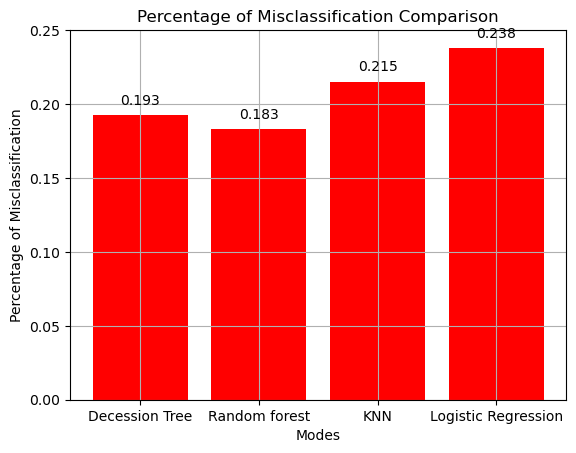

In [39]:
# Percentage of misclassification data
misclassification = [0.19272113022113024, 0.18304668304668303, 0.21529484029484025, 0.23817567567567566]

# Plot percentage of misclassification graph
bar_width = 0.2  # Adjust the column width
plt.bar(modes, misclassification, color='red', width=bar_width)
# Display values on top of each column
for i, val in enumerate(misclassification):
    plt.text(i, val + 0.005, f'{val:.3f}', ha='center', va='bottom', fontsize=10)

plt.bar(modes, misclassification, color='red')
plt.xlabel('Modes')
plt.ylabel('Percentage of Misclassification')
plt.title('Percentage of Misclassification Comparison')
plt.grid(True)
plt.show()


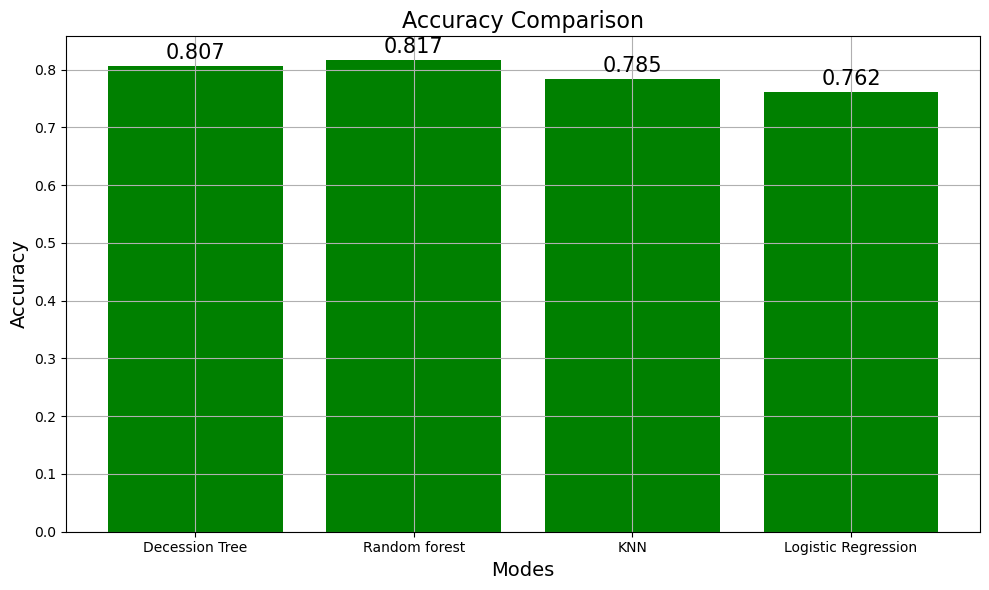

In [53]:
import matplotlib.pyplot as plt

# Accuracy data
accuracy = [1 - mis for mis in misclassification]

# Plot accuracy graph with different colors and values
plt.figure(figsize=(10, 6))
bar_width = 0.1
plt.bar(modes, accuracy, color='green')

# Display values on top of each column
for i, val in enumerate(accuracy):
    plt.text(i, val + 0.005, f'{val:.3f}', ha='center', va='bottom', fontsize=15)

plt.xlabel('Modes', fontsize=14)  # Increase fontsize for x-axis label
plt.ylabel('Accuracy', fontsize=14)  # Increase fontsize for y-axis label
plt.title('Accuracy Comparison', fontsize=16)  # Increase fontsize for title

plt.grid(True)
plt.tight_layout()
plt.show()


